In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.odr as odr
import pandas as pd
from uncertainties import ufloat, unumpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://stackoverflow.com/questions/22348756/upright-mu-in-plot-label-retaining-original-tick-fonts
# https://stackoverflow.com/questions/2537868/sans-serif-math-with-latex-in-matplotlib

import matplotlib
from matplotlib import rc

## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})

#params = {'text.latex.preamble':[r'\usepackage{siunitx}',
#                                 r'\usepackage{amsmath}',
#                                 r'\usepackage{physics}',
#                                 r'\usepackage{sfmath}',
#                                 r'\sisetup{detect-all=true}']}

params = {'text.usetex':True,
          'font.family':'serif',
          'font.sans-serif':'cm',
          'text.latex.preamble':[r'\usepackage{siunitx}',
                                 r'\usepackage{amsmath}',
                                 r'\usepackage{physics}',
                                 r'\usepackage{mathptmx}',
                                 r'\sisetup{detect-all=true}',
                                 r'\DeclareSIUnit\inch{in}',
                                 r'\DeclareSIUnit\gauss{G}'],
          'mathtext.fontset':'cm'}
plt.rcParams.update(params)

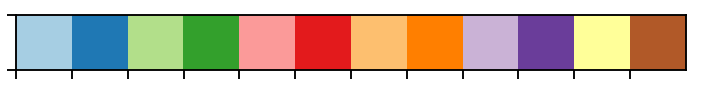

In [3]:
sns.set_context('talk')
sns.palplot(sns.color_palette("Paired"))

In [4]:
blue_coil_lower = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-BlueCoil1')
blue_coil_upper = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-BlueCoil2')
blue_coil_both = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-BlueMOTCoil')

red_coil_lower = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-RedCoil1')
red_coil_upper = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-RedCoil2')
red_coil_both = pd.read_excel('Rydberg-MOTCoilFieldMeasurement.xlsx', sheet_name='Data-RedMOTCoil')

In [5]:
delta_z = 0.25
delta_B = 0.05

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(12,10))

# Blue anti-Helmholtz coils
axes[0,0].errorbar(x=blue_coil_both['z'], y=blue_coil_both['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[0,0].errorbar(x=blue_coil_both['z'], y=blue_coil_both['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[0,0].errorbar(x=blue_coil_both['z'], y=blue_coil_both['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Blue upper coils
axes[1,0].errorbar(x=blue_coil_upper['z'], y=blue_coil_upper['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[1,0].errorbar(x=blue_coil_upper['z'], y=blue_coil_upper['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[1,0].errorbar(x=blue_coil_upper['z'], y=blue_coil_upper['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Blue lower coils
axes[2,0].errorbar(x=blue_coil_lower['z'], y=blue_coil_lower['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[2,0].errorbar(x=blue_coil_lower['z'], y=blue_coil_lower['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[2,0].errorbar(x=blue_coil_lower['z'], y=blue_coil_lower['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Red anti-Helmholtz coils
axes[0,1].errorbar(x=red_coil_both['z'], y=red_coil_both['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[0,1].errorbar(x=red_coil_both['z'], y=red_coil_both['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[0,1].errorbar(x=red_coil_both['z'], y=red_coil_both['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Red upper coils
axes[1,1].errorbar(x=red_coil_upper['z'], y=red_coil_upper['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[1,1].errorbar(x=red_coil_upper['z'], y=red_coil_upper['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[1,1].errorbar(x=red_coil_upper['z'], y=red_coil_upper['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Red lower coils
axes[2,1].errorbar(x=red_coil_lower['z'], y=red_coil_lower['B_x'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_x$')
axes[2,1].errorbar(x=red_coil_lower['z'], y=red_coil_lower['B_y'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_y$')
axes[2,1].errorbar(x=red_coil_lower['z'], y=red_coil_lower['B_z'],
                   xerr=delta_z, yerr=delta_B,
                   fmt='.', capsize=4, label=r'$B_z$')

# Axis labels
axes[0,0].set_title(r'Blue coils')
axes[0,1].set_title(r'Red coils')

axes[0,0].set_ylabel(r'Anti-Helmholtz coils [\si{\gauss}]')
axes[1,0].set_ylabel(r'Upper coil [\si{\gauss}]')
axes[2,0].set_ylabel(r'Lower coil [\si{\gauss}]')

axes[0,1].set_ylabel(r'Anti-Helmholtz coils [\si{\gauss}]')
axes[1,1].set_ylabel(r'Upper coil [\si{\gauss}]')
axes[2,1].set_ylabel(r'Lower coil [\si{\gauss}]')

axes[2,0].set_xlabel(r'$z$ [\si{cm}]')
axes[2,1].set_xlabel(r'$z$ [\si{cm}]')

# Legend
#axes[2,0].legend(frameon=False)
axes[2,1].legend(frameon=False)

# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132
#axes[2,1].legend(ncol=3, frameon=False, bbox_transform=fig.transFigure, bbox_to_anchor=(1,0))

# Plot ranges
for ax in axes.flatten():
    ax.set_xlim((-7,7))
axes[0,0].set_ylim((-23,23))
axes[1,0].set_ylim((-23,23))
axes[2,0].set_ylim((-23,23))

axes[0,1].set_ylim((-13,13))
axes[1,1].set_ylim((-13,13))
axes[2,1].set_ylim((-13,13))

# Axis options
for ax in axes.flatten():
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True, direction='in', length=6)

# Adjust spacing between subplots (need to run plt.tight_layout() before adjusting subplot spacing)
plt.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('mot_coil_fields.pdf', bbox_inches='tight')
plt.show()

FileNotFoundError: missing font metrics file: rsfs10

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001BB575B2378> (for post_execute):


FileNotFoundError: missing font metrics file: rsfs10

FileNotFoundError: missing font metrics file: rsfs10

<Figure size 864x720 with 6 Axes>